In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cvd = pd.read_excel('/Users/leona/Documents/Personales/Data Analytics-Simpli Learn/5-Data Analyst Capstone/Project 1/1582800613_project3datadictionary/data.xlsx')

# Importing, Understanding, and Inspecting Data :

## 1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

### To know the Data Frame structure we apply .info()

In [3]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### So, in CVD DatraFrame, we have 303 records; 13 variables (columns), all numericals: 12 integer and 1 Float. There is no missing values

### To have an idea if there are categorical variables in our data set we can apply '.nunique()'. This will give how many unique values are in the DF.

In [4]:
cvd.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

#### According with this, we can say that the DF has 9 categorical variables converted in numerical: sex, cp, fbs, restecg, exang, slope, ca, thal, and the variable target

### To find out if there are duplicates in the DF we apply .duplicated()

In [5]:
duplicates_cvd = cvd[cvd.duplicated(keep=False)] 
# We apply "keep=False" as argument to know 
# which is the original and which is the duplicated

In [6]:
duplicates_cvd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#### According with this, we have one row duplicated: 164, that is duplicated from 163

### I want to know if there is some missing values or errors like '0' where should not be; but when i see all unique values in each column for the dataframe i see no errors, just 0 in what would be the categorical variables

In [7]:
cvd.apply(lambda col: col.unique())

age         [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5...
sex                                                    [1, 0]
cp                                               [3, 2, 1, 0]
trestbps    [145, 130, 120, 140, 172, 150, 110, 135, 160, ...
chol        [233, 250, 204, 236, 354, 192, 294, 263, 199, ...
fbs                                                    [1, 0]
restecg                                             [0, 1, 2]
thalach     [150, 187, 172, 178, 163, 148, 153, 173, 162, ...
exang                                                  [0, 1]
oldpeak     [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ...
slope                                               [0, 2, 1]
ca                                            [0, 2, 1, 3, 4]
thal                                             [1, 2, 3, 0]
target                                                 [1, 0]
dtype: object

#### According with the description, 'thal' and 'ca' could have a wrong observation. 'thal' has 3 categories: 1, 2, and 3; but in this data set it also has 0. On the other side, 'ca' should have 4 values, form 0 to 3, but in the dataset has 4, also.

age: 	 age in years

sex:	 (1 = male; 0 = female)

cp: 	 chest pain type

trestbps: 	 resting blood pressure (in mm Hg on admission to the hospital)

chol: 	 serum cholestoral in mg/dl

fbs: 	 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: 	 resting electrocardiographic results

thalach: 	 maximum heart rate achieved

exang: 	 exercise induced angina (1 = yes; 0 = no)

oldpeak: 	 ST depression induced by exercise relative to rest

slope: 	 the slope of the peak exercise ST segment

ca: 	 number of major vessels (0-3) colored by flourosopy

thal: 	 3 = normal; 6 = fixed defect; 7 = reversable defect

target: 	 1 or 0

In [8]:
# So, we check 'thal' and 'ca' value counts

print(cvd['thal'].value_counts())
print(cvd['ca'].value_counts())

2    166
3    117
1     18
0      2
Name: thal, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


#### There is the suggestion that 0 could be a 'missing value' in 'thal', and '4' in 'ca'

## 2. Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

### We are going to drop the duplicate row that we found because we did not detect any missing values

#### In order to drop the duplicated row we call '.drop_duplicates(inplace=True)'

In [9]:
cvd.drop_duplicates(inplace=True)

#### we can confirm if there is any duplicate by checking again

In [10]:
cvd.duplicated().sum()


0

#### Furthermore, we have to treat the 'missing value' found on 'thal' and 'ca'. In order to do that, it will replaced by the mode of the variable; since 'thal' is a categorical variable, it will be changed by the most frequently observation, which is:

In [11]:
# Previously, we found that '2' is the most frequently value in 'thal', so '0' will be replaced by this number

cvd.replace({"thal":0},2, inplace=True)

In [12]:
# We also found that '0' is the most frequently value in 'ca', so '4' will be replaced by this number

cvd.replace({"ca":4},0, inplace=True)

In [13]:
# We check again 'thal' and 'ca' to see if the changes was applied:

print(cvd['thal'].value_counts())
print(cvd['ca'].value_counts())

2    167
3    117
1     18
Name: thal, dtype: int64
0    179
1     65
2     38
3     20
Name: ca, dtype: int64


## 3. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

### We want to know the descriptive statistic for our DataFrame, so we apply .describe() and .agg to compare other types of basic statistics as median

In [14]:
cvd.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.42,0.68,0.96,131.60,246.50,0.15,0.53,149.57,0.33,1.04,1.40,0.67,2.33,0.54
std,9.05,0.47,1.03,17.56,51.75,0.36,0.53,22.90,0.47,1.16,0.62,0.94,0.58,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.25,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.50,1.00,1.00,130.00,240.50,0.00,1.00,152.50,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.75,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,3.00,1.00


In [15]:
cvd.agg(['mean','median','min','max',])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,54.42053,0.682119,0.963576,131.602649,246.5,0.149007,0.52649,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
median,55.50000,1.000000,1.000000,130.000000,240.5,0.000000,1.00000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
min,29.00000,0.000000,0.000000,94.000000,126.0,0.000000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,77.00000,1.000000,3.000000,200.000000,564.0,1.000000,2.00000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


#### The above information tell us that may be some outliers in a couple of variables: trestbps, chol, and thalach. This is because its SD are relatively high and the median and mean are different. The remaining variables looks pretty normal in distribution.

# Performing EDA:

## 4. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

### According with the data, it looks like there are 9 categorical variables, including the target variable. I will create a count of these categorical variables:

In [16]:
# create a data with all the categoriacal variables:
cat = cvd[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']]
cat

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


#### Create a df with a melt data of categories to count them by de numerical and understand if there are atypical values

In [17]:
cats_counts = cat.melt(var_name='columns', value_name='index')
cats_counts

,columns,index
0,sex,1
1,sex,1
2,sex,0
3,sex,1
4,sex,0
...,...,...
2713,target,0
2714,target,0
2715,target,0
2716,target,0


#### Make a crosstab to display the number of categories and its counts

In [18]:
pd.crosstab(index=cats_counts['index'], columns=cats_counts['columns'])

columns,ca,cp,exang,fbs,restecg,sex,slope,target,thal
index,,,,,,,,,
0,179,143,203,257,147,96,21,138,0
1,65,50,99,45,151,206,140,164,18
2,38,86,0,0,4,0,141,0,167
3,20,23,0,0,0,0,0,0,117


In [19]:
# Another way to display the observations of each categorical variable:

cat.apply(lambda col: col.unique())

sex              [1, 0]
cp         [3, 2, 1, 0]
fbs              [1, 0]
restecg       [0, 1, 2]
exang            [0, 1]
slope         [0, 2, 1]
ca         [0, 2, 1, 3]
thal          [1, 2, 3]
target           [1, 0]
dtype: object

### Now, we create a count plot for all the categorical variables to know the distribution of their values

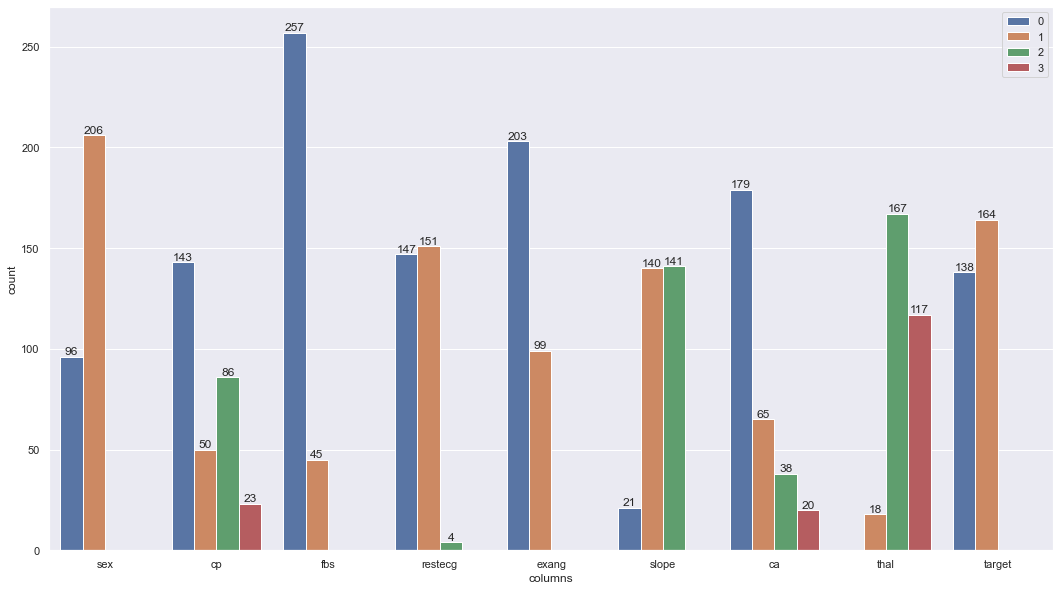

In [20]:
sns.set(rc={"figure.figsize":(18, 10)})
ax = sns.countplot(x='columns', hue='index', data=cats_counts)
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper right')


## 5. Study the occurrence of CVD across different ages.

### First of all, we are going to create an object variable/column for our target variable. We are calling it fo 0=No disease, and for 1=Disease

In [21]:
def target_categorize(row):
    if row['target'] == 0:
        return 'No Disease'
    elif row['target'] == 1:
        return 'Disease'

In [22]:
cvd['target_category'] = cvd.apply(lambda row: target_categorize(row), axis=1)
cvd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Disease
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Disease
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Disease
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Disease
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,No Disease
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,No Disease
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,No Disease
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,No Disease


### The simplest analysis that can be made is a boxplot of ages with the target variable:

<AxesSubplot:xlabel='target_category', ylabel='age'>

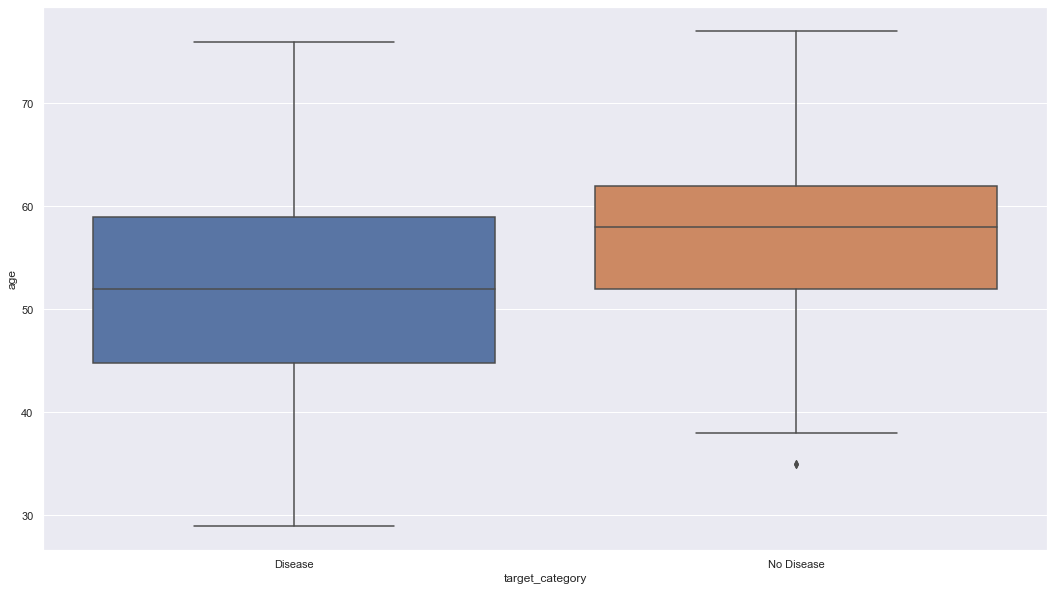

In [23]:
sns.boxplot(x="target_category", y="age", data=cvd)

In [24]:
# We can also calculate means of each group.

cvd.groupby('target_category')['age'].mean()

target_category
Disease       52.585366
No Disease    56.601449
Name: age, dtype: float64

#### The boxplot  tell us basically that the distribution of the data by age is pretty normal, and the median of 'No_disease' is greater than 'Disease'. The mean age with 'No disease' is 56 years old, and for 'Disease' is 52 years old.

### In order to make study the occurrence of cvd across different ages, we make a histogram of ages to select the number of bins and the size of each one

<AxesSubplot:xlabel='age', ylabel='Count'>

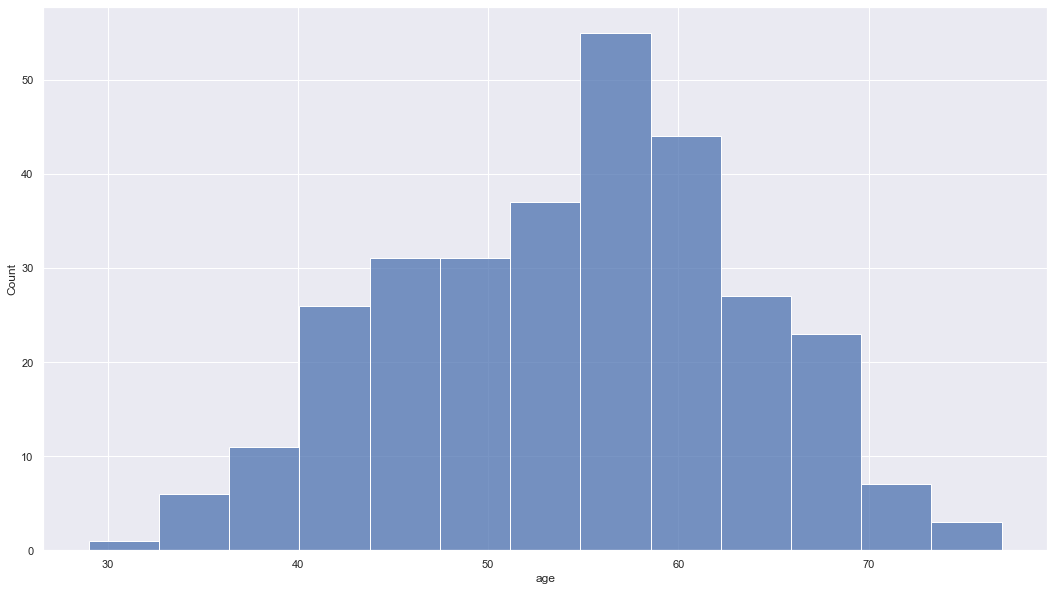

In [25]:
sns.histplot(data=cvd, x="age")

In [26]:
# Instead of the plot, we create get an array of the histogram to now better the range of bins.
np.histogram(cvd[['age']])

(array([ 1, 10, 33, 38, 37, 60, 63, 43, 14,  3]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]))

### We get 10 bins; so we are going to split the ages in this bins to know the how much is the occurrency of CVD

In [27]:
bins_age = pd.cut(cvd['age'],[28,34,38,43,48,53,58,63,67,72,77]) # Make the bins

In [28]:
bins_age_counts = bins_age.value_counts() # To know how many observations are in each beans.

In [29]:
bins_age_counts.sum()

302

In [30]:
# ADD variable 'age_bins' to cvd DF
cvd['age_bins'] = bins_age

In [31]:
cvd.nunique()

age                 41
sex                  2
cp                   4
trestbps            49
chol               152
fbs                  2
restecg              3
thalach             91
exang                2
oldpeak             40
slope                3
ca                   4
thal                 3
target               2
target_category      2
age_bins            10
dtype: int64

### Now, we'll agroup 'age_bins' and target to know the occurrence of CVD. In order to do that, we 'groupby' and apply '.size()' or '.count()'

In [32]:
cvd_By_age = cvd[['age_bins','target']].groupby(['target','age_bins']).size()

In [33]:
cvd_By_age

target  age_bins
0       (28, 34]     0
        (34, 38]     3
        (38, 43]     8
        (43, 48]    13
        (48, 53]    14
        (53, 58]    39
        (58, 63]    37
        (63, 67]    17
        (67, 72]     6
        (72, 77]     1
1       (28, 34]     3
        (34, 38]     5
        (38, 43]    25
        (43, 48]    25
        (48, 53]    31
        (53, 58]    32
        (58, 63]    16
        (63, 67]    17
        (67, 72]     8
        (72, 77]     2
dtype: int64

In [34]:
cvd_By_age = cvd_By_age.reset_index() # Reset the index of the grouping set

In [35]:
cvd_By_age=pd.DataFrame(cvd_By_age) # Convert to dataframe

In [36]:
cvd_By_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   target    20 non-null     int64   
 1   age_bins  20 non-null     category
 2   0         20 non-null     int64   
dtypes: category(1), int64(2)
memory usage: 1.2 KB


In [37]:
cvd_By_age

,target,age_bins,0
0,0,"(28, 34]",0
1,0,"(34, 38]",3
2,0,"(38, 43]",8
3,0,"(43, 48]",13
4,0,"(48, 53]",14
5,0,"(53, 58]",39
6,0,"(58, 63]",37
7,0,"(63, 67]",17
8,0,"(67, 72]",6
9,0,"(72, 77]",1


In [38]:
cvd_By_age.rename(columns={0: "Freq"}, inplace=True) # To change name of column '0'

In [39]:
cvd_By_age

,target,age_bins,Freq
0,0,"(28, 34]",0
1,0,"(34, 38]",3
2,0,"(38, 43]",8
3,0,"(43, 48]",13
4,0,"(48, 53]",14
5,0,"(53, 58]",39
6,0,"(58, 63]",37
7,0,"(63, 67]",17
8,0,"(67, 72]",6
9,0,"(72, 77]",1


In [40]:
cvd_By_age['% by age'] = (100 * cvd_By_age['Freq'] / cvd_By_age.groupby('target')['Freq'].transform('sum')).round(2)
cvd_By_age

,target,age_bins,Freq,% by age
0,0,"(28, 34]",0,0.00
1,0,"(34, 38]",3,2.17
2,0,"(38, 43]",8,5.80
3,0,"(43, 48]",13,9.42
4,0,"(48, 53]",14,10.14
5,0,"(53, 58]",39,28.26
6,0,"(58, 63]",37,26.81
7,0,"(63, 67]",17,12.32
8,0,"(67, 72]",6,4.35
9,0,"(72, 77]",1,0.72


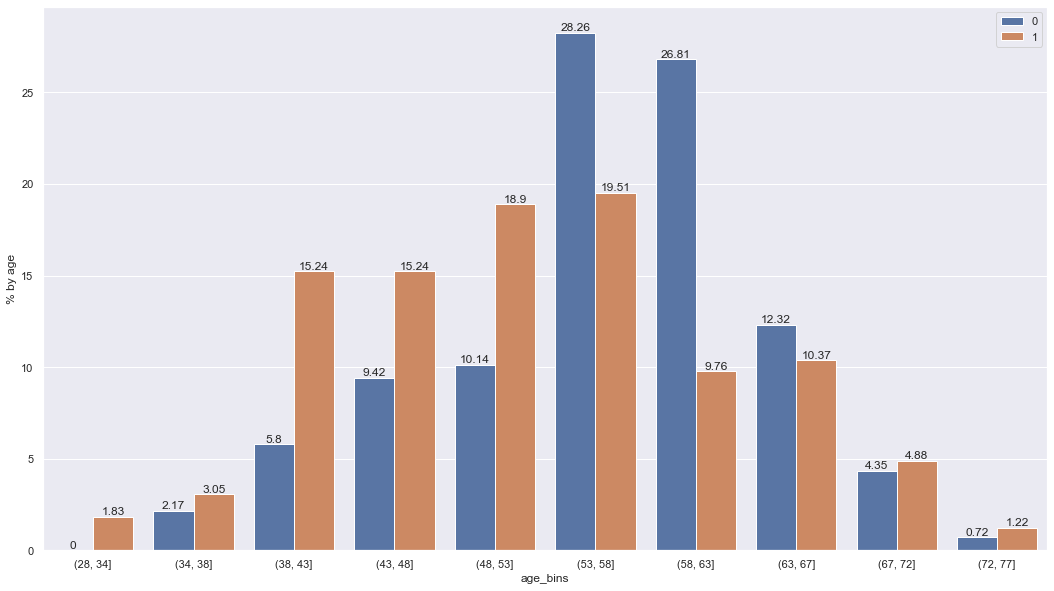

In [41]:
ax = sns.barplot(x='age_bins', hue='target', y='% by age', data=cvd_By_age)
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper right')

In [42]:
print(cvd_By_age.iloc[2:8,(-1)].sum())
print(cvd_By_age.iloc[12:18,(-1)].sum())

92.75
89.02000000000001


### In this case, we can say that 92% of people that do not have CVD is between 38 and 67 years old; also, in this same range of age, 89% of the people is having CVD 

### The occurency of CVD is 164 cases, according with our data set. It means, 54% of the people. When we see the occurrency by ages, we detect that 68% of the cases occurre between 38 and 58 year; Furthermore, between 58 and 72, CVD occurre in 16.5 % of the cases

## 6. Can we detect heart attack based on anomalies in resting blood pressure of the patient?

### Since we have a continuous variable and a categorical variable as target we can compare it by a box plot and the mean of trestbps with target variable

<AxesSubplot:xlabel='target_category', ylabel='trestbps'>

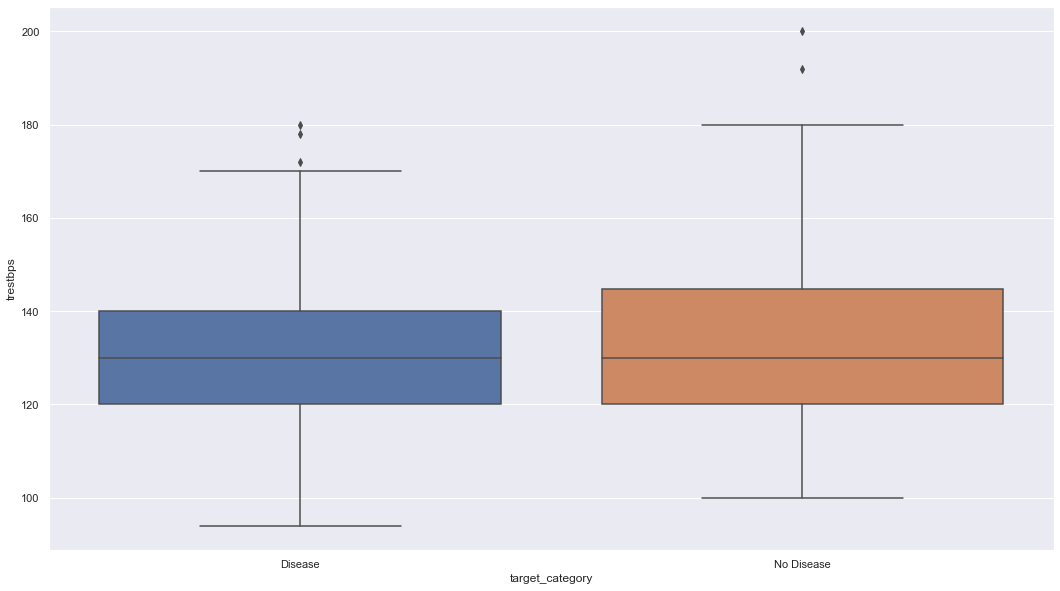

In [43]:
sns.boxplot(x="target_category", y="trestbps", data=cvd)

In [44]:
cvd.groupby(['target_category'])['trestbps'].mean()

target_category
Disease       129.250000
No Disease    134.398551
Name: trestbps, dtype: float64

#### When plotting the BoxPlot, we can see that there is no difference between 'Disease' and 'No disease' people and its resting blood pressure levels; but when we compare the means, we found out that people with 'No disease' of CVD have higher TRESTBPS

### To know if there is relation between cvd and  resting electrocardiographic results it is necessary to apply the Chi-Squared test

### Manual Way

In [45]:
import scipy.stats as stats

In [46]:
# Get observed frequencies

observed = pd.crosstab(cvd['restecg'],cvd['target'], margins=True)

In [47]:
observed.columns = [0,1,'row_totals']
observed.index = [0,1,2,'col_totals']
observed

,0,1,row_totals
0,79,68,147
1,56,95,151
2,3,1,4
col_totals,138,164,302


In [48]:
# Get expected frecuencies

expected =  np.outer(observed["row_totals"][0:3], observed.loc["col_totals"][0:2]) / 302
expected = pd.DataFrame(expected)
expected.columns = [0,1]
expected.index = [0,1,2]
expected

,0,1
0,67.172185,79.827815
1,69.000000,82.000000
2,1.827815,2.172185


In [49]:
# Calculate Chi-squared

chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

9.729682311241927


In [50]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=2)
print("P value")
print(p_value)

Critical value
5.991464547107979
P value
0.007713053269318926


### With chi-squared function

In [51]:
chisquare = pd.crosstab(cvd['restecg'],cvd['target'])

In [52]:
chisquare

target,0,1
restecg,,
0,79,68
1,56,95
2,3,1


In [53]:
from scipy.stats import chi2_contingency

In [54]:
chi2_contingency(chisquare)

(9.729682311241927,
 0.007713053269318974,
 2,
 array([[67.17218543, 79.82781457],
        [69.        , 82.        ],
        [ 1.82781457,  2.17218543]]))

### Both way give the same results: According with Chi-squared Test, we reject Ho, and can say, that heart attack depends on resting electrocardiographic results and viceversa

## 7. Study the composition of overall patients w.r.t . gender.

### We can apply Chi-squared test to know if there is a relationship between sex and our target variable

In [55]:
chisquare_sex = pd.crosstab(cvd['sex'],cvd['target'])
chisquare_sex

target,0,1
sex,,
0,24,72
1,114,92


In [56]:
chi2_contingency(chisquare_sex)

(23.083879459669042,
 1.5508552054949547e-06,
 1,
 array([[ 43.86754967,  52.13245033],
        [ 94.13245033, 111.86754967]]))

#### So we can say that sex and our target variable are related each other

### Now, to sew how is spread our target variable in the sex variable We have to do the same as with ages_bins, but with 'sex'.

In [57]:
cvd_By_sex = cvd[['target','sex']].groupby(['sex','target']).size()

In [58]:
cvd_By_sex

sex  target
0    0          24
     1          72
1    0         114
     1          92
dtype: int64

In [59]:
cvd_By_sex=cvd_By_sex.reset_index()

In [60]:
cvd_By_sex['freq'] = cvd_By_sex[0]

In [61]:
cvd_By_sex

,sex,target,0,freq
0,0,0,24,24
1,0,1,72,72
2,1,0,114,114
3,1,1,92,92


In [62]:
cvd_By_sex.drop(0, axis=1, inplace=True)

In [63]:
cvd_By_sex['freq %'] = (cvd_By_sex['freq']/cvd_By_sex['freq'].sum()*100).round(2)

In [64]:
cvd_By_sex

,sex,target,freq,freq %
0,0,0,24,7.95
1,0,1,72,23.84
2,1,0,114,37.75
3,1,1,92,30.46


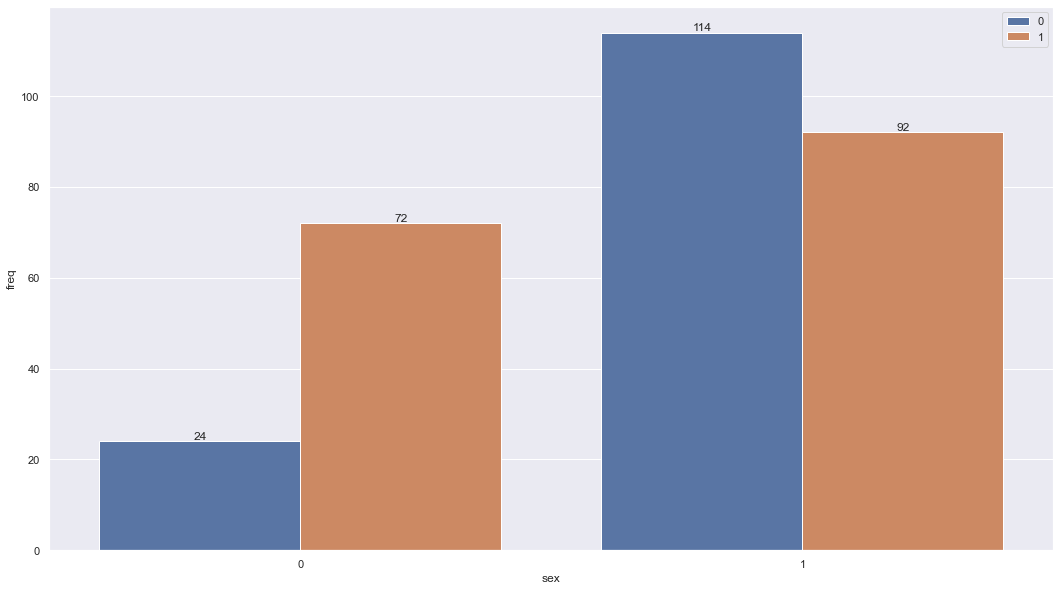

In [65]:
af = sns.barplot(x='sex', hue='target', y='freq', data=cvd_By_sex)
for container in af.containers:
    af.bar_label(container)
plt.legend(loc='upper right')

In [66]:
cvd_By_sex['% by sex'] = (100 * cvd_By_sex['freq'] / cvd_By_sex.groupby('sex')['freq'].transform('sum')).round(2)

In [67]:
cvd_By_sex

,sex,target,freq,freq %,% by sex
0,0,0,24,7.95,25.00
1,0,1,72,23.84,75.00
2,1,0,114,37.75,55.34
3,1,1,92,30.46,44.66


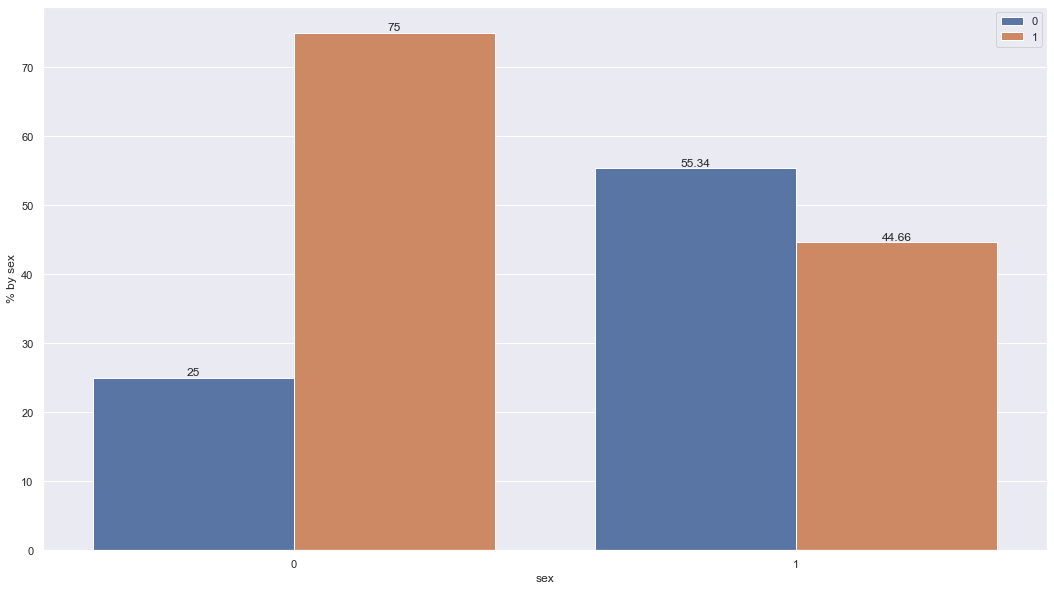

In [68]:
af = sns.barplot(x='sex', hue='target', y='% by sex', data=cvd_By_sex)
for container in af.containers:
    af.bar_label(container)
plt.legend(loc='upper right')

### According with the analysis, in this data set 32% of the peoples are women and 68% men: 25% of women do not have CVD and 75% yes. In men, 55% do not have, and 45 have.

# Performing EDA and Modeling:

## 1. Describe the relationship between cholesterol levels and our target variable.

## In order to do that, we are going to use a box plot to compare the distribution of the 'chol' variable in people with CVD and not CVD

<AxesSubplot:xlabel='target_category', ylabel='chol'>

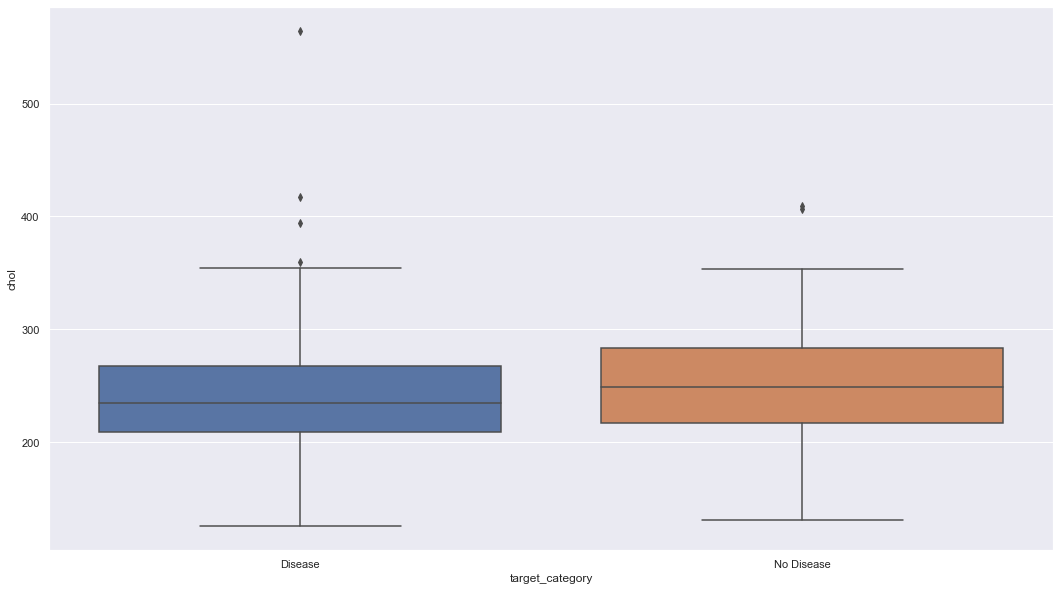

In [69]:
sns.boxplot(x="target_category", y="chol", data=cvd)

#### According with these values, people whose target variable is 'Disease' has a lower median of cholesterol levels than people with target variable as 'No Disease'

## 2. What can be concluded about the relationship between peak exercising and occurrence of heart attack?

In [70]:
cvd.slope.value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

### Since these two variables are categorical, we will apply again chi-squared test

In [71]:
chisquare_slope = pd.crosstab(cvd['slope'],cvd['target'])
chisquare_slope

target,0,1
slope,,
0,12,9
1,91,49
2,35,106


In [72]:
chi2_contingency(chisquare_slope)

(46.889476601618135,
 6.577782760917924e-11,
 2,
 array([[ 9.59602649, 11.40397351],
        [63.97350993, 76.02649007],
        [64.43046358, 76.56953642]]))

#### According with the results, both variables are related

### Now, we want to know the occurency of CVD Disease across slope categories.

In [73]:
cvd_By_slope = cvd[['target','slope']].groupby(['slope','target']).size()
cvd_By_slope=pd.DataFrame(cvd_By_slope).reset_index()
cvd_By_slope.rename(columns={0:'freq'}, inplace=True)
cvd_By_slope

,slope,target,freq
0,0,0,12
1,0,1,9
2,1,0,91
3,1,1,49
4,2,0,35
5,2,1,106


In [74]:
# Add percentage column of frequencies by Slope

cvd_By_slope['% by slope'] = (100*cvd_By_slope['freq'] / cvd_By_slope.groupby('slope')['freq'].transform('sum')).round(2)
cvd_By_slope

,slope,target,freq,% by slope
0,0,0,12,57.14
1,0,1,9,42.86
2,1,0,91,65.00
3,1,1,49,35.00
4,2,0,35,24.82
5,2,1,106,75.18


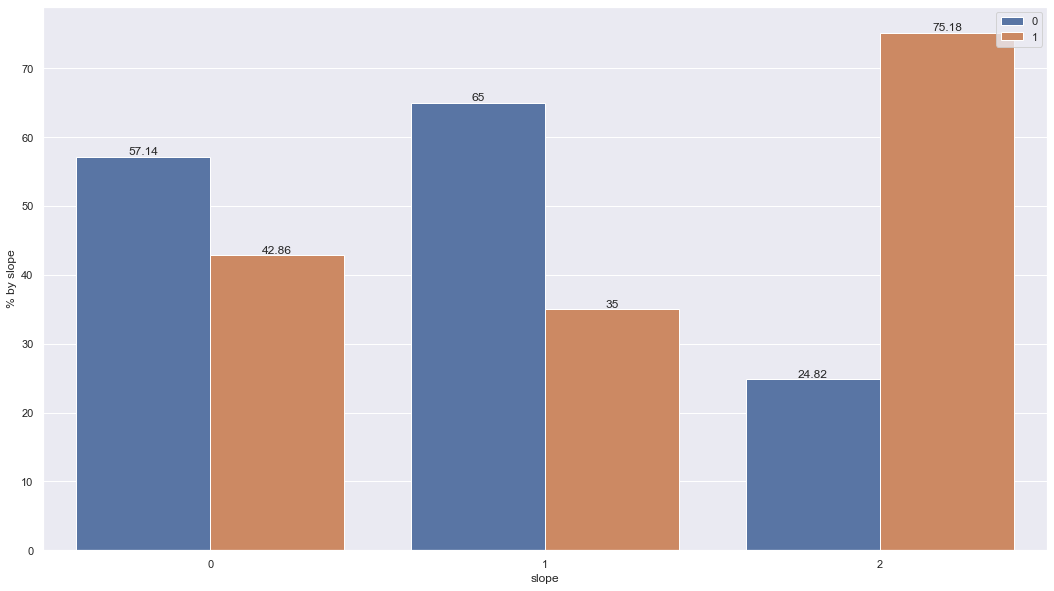

In [75]:
ab = sns.barplot(x='slope', hue='target', y='% by slope', data=cvd_By_slope)
for container in ab.containers:
    ab.bar_label(container)
plt.legend(loc='upper right')

In [76]:
cvd_By_slope['% of slope'] = (cvd_By_slope['freq'] / cvd_By_slope['freq'].sum()*100).round(2)
cvd_By_slope['slope% of target'] = (100*cvd_By_slope['freq'] / cvd_By_slope.groupby('target')['freq'].transform('sum')).round(2)
cvd_By_slope

,slope,target,freq,% by slope,% of slope,slope% of target
0,0,0,12,57.14,3.97,8.70
1,0,1,9,42.86,2.98,5.49
2,1,0,91,65.00,30.13,65.94
3,1,1,49,35.00,16.23,29.88
4,2,0,35,24.82,11.59,25.36
5,2,1,106,75.18,35.10,64.63


#### So, according with the above plot, the third segment ('2') is the one with the major occurency of cvd Disease, since the 75% of the cases were reported as 1 ('Disease'). These cases are the 75% of the total cases, and 65% of the 'Disease' people (people target as 1)

## 3. Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

### Since thalassemia is a categorical variable, we can apply th chi-squared test to find out if these variables are dependent or not

In [77]:
chisquare_thal = pd.crosstab(cvd['thal'],cvd['target'])
chisquare_thal

target,0,1
thal,,
1,12,6
2,37,130
3,89,28


In [78]:
chi2_contingency(chisquare_thal)

(83.97786759641842,
 5.8135009856856e-19,
 2,
 array([[ 8.22516556,  9.77483444],
        [76.31125828, 90.68874172],
        [53.46357616, 63.53642384]]))

#### According with the chi-squared test, thalassemia and CVD are dependent.

In [79]:
cvd_By_thal = cvd[['target','thal']].groupby(['thal','target']).size()
cvd_By_thal=pd.DataFrame(cvd_By_thal).reset_index()
cvd_By_thal.rename(columns={0:'freq'}, inplace=True)
cvd_By_thal

,thal,target,freq
0,1,0,12
1,1,1,6
2,2,0,37
3,2,1,130
4,3,0,89
5,3,1,28


In [80]:
cvd_By_thal['% of thal'] = (cvd_By_thal['freq'] / cvd_By_thal['freq'].sum()*100).round(2)
cvd_By_thal['% in thal'] = (100*cvd_By_thal['freq'] / cvd_By_thal.groupby('thal')['freq'].transform('sum')).round(2)
cvd_By_thal['% thal in target'] = (100*cvd_By_thal['freq'] / cvd_By_thal.groupby('target')['freq'].transform('sum')).round(2)
cvd_By_thal

,thal,target,freq,% of thal,% in thal,% thal in target
0,1,0,12,3.97,66.67,8.70
1,1,1,6,1.99,33.33,3.66
2,2,0,37,12.25,22.16,26.81
3,2,1,130,43.05,77.84,79.27
4,3,0,89,29.47,76.07,64.49
5,3,1,28,9.27,23.93,17.07


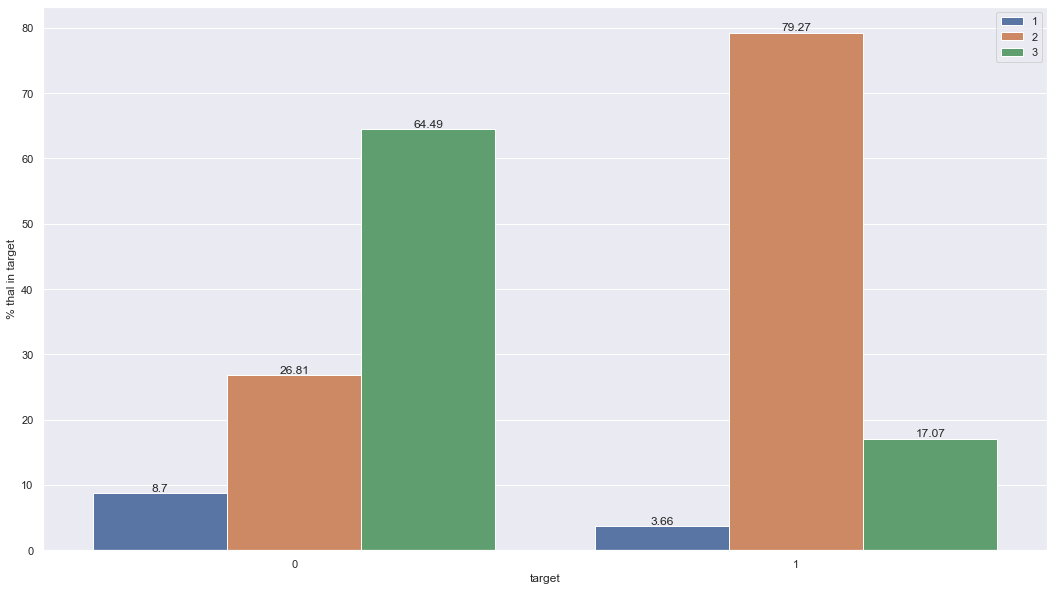

In [81]:
thal_cvd = sns.barplot(x='target', hue='thal', y='% thal in target', data=cvd_By_thal)
for container in thal_cvd.containers:
    thal_cvd.bar_label(container)
plt.legend(loc='upper right')

#### According with this analysis, the major occurency of CVD Disease was seen in thal = 2: 79% of the people with CVD was registered in that stage.

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

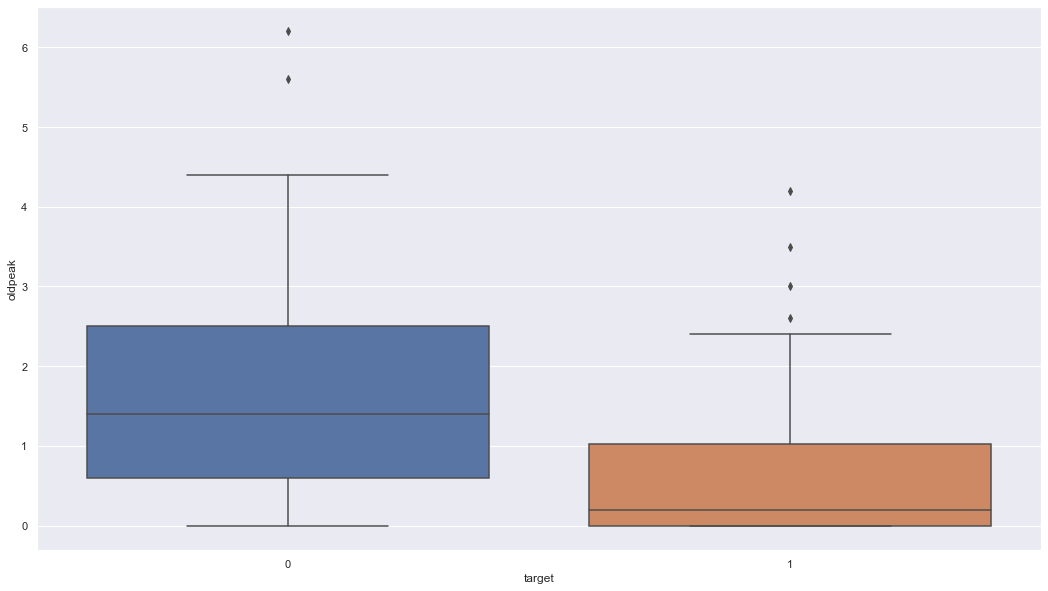

In [82]:
sns.boxplot(x="target", y="oldpeak", data=cvd)

### 3.1 Relation of Chest pain (CP) type, fasting blood sugar (FBS),  exercise induced angina (EXANG), and CA with CVD

In [83]:
chisquare_cp = pd.crosstab(cvd['cp'],cvd['target'])
chisquare_cp

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


In [84]:
chi2_contingency(chisquare_cp)

(80.97876150785669,
 1.8926838351935918e-17,
 3,
 array([[65.34437086, 77.65562914],
        [22.84768212, 27.15231788],
        [39.29801325, 46.70198675],
        [10.50993377, 12.49006623]]))

In [85]:
chisquare_fbs = pd.crosstab(cvd['fbs'],cvd['target'])
chisquare_fbs

target,0,1
fbs,,
0,116,141
1,22,23


In [86]:
chi2_contingency(chisquare_fbs)

(0.09240835568001494,
 0.7611374700928197,
 1,
 array([[117.43708609, 139.56291391],
        [ 20.56291391,  24.43708609]]))

In [87]:
chisquare_exang = pd.crosstab(cvd['exang'],cvd['target'])
chisquare_exang

target,0,1
exang,,
0,62,141
1,76,23


In [88]:
chi2_contingency(chisquare_exang)

(55.45620298199192,
 9.556466486179178e-14,
 1,
 array([[ 92.7615894, 110.2384106],
        [ 45.2384106,  53.7615894]]))

In [89]:
chisquare_ca = pd.crosstab(cvd['ca'],cvd['target'])
chisquare_ca

target,0,1
ca,,
0,46,133
1,44,21
2,31,7
3,17,3


In [90]:
chi2_contingency(chisquare_ca)

(73.6890417875077,
 6.919066104481066e-16,
 3,
 array([[81.79470199, 97.20529801],
        [29.70198675, 35.29801325],
        [17.36423841, 20.63576159],
        [ 9.13907285, 10.86092715]]))

#### According with the chi-squared test, the only variable independent from CVD is FBS - Fasting Blood Sugar

### Relation between 'thalach' and our CVD

<AxesSubplot:xlabel='target_category', ylabel='thalach'>

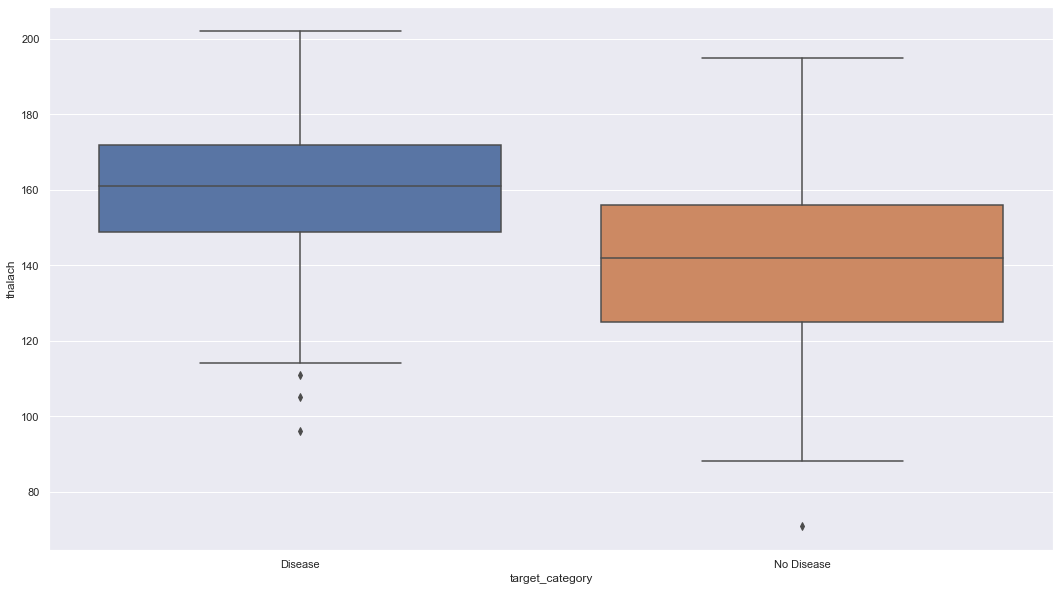

In [91]:
sns.boxplot(x="target_category", y="thalach", data=cvd)

In [92]:
cvd.groupby(['target_category'])['thalach'].mean()

target_category
Disease       158.378049
No Disease    139.101449
Name: thalach, dtype: float64

## 5. Perform  logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

### We will construct our Logistic Regression, but first, we need to check multinolinearity of the features/independent variables

AttributeError: 'FacetGrid' object has no attribute 'containers'

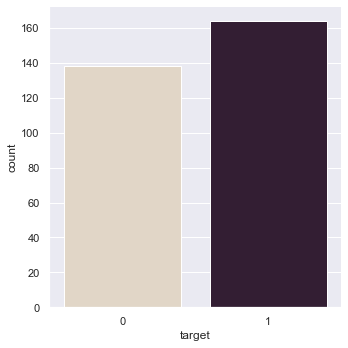

In [251]:
count_target=sns.catplot(x="target", kind="count", palette="ch:.25", data=cvd)

In [451]:
# It is necessary to check correlations between the features variables to have a first look up of multicolinearity

correlation = cvd.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

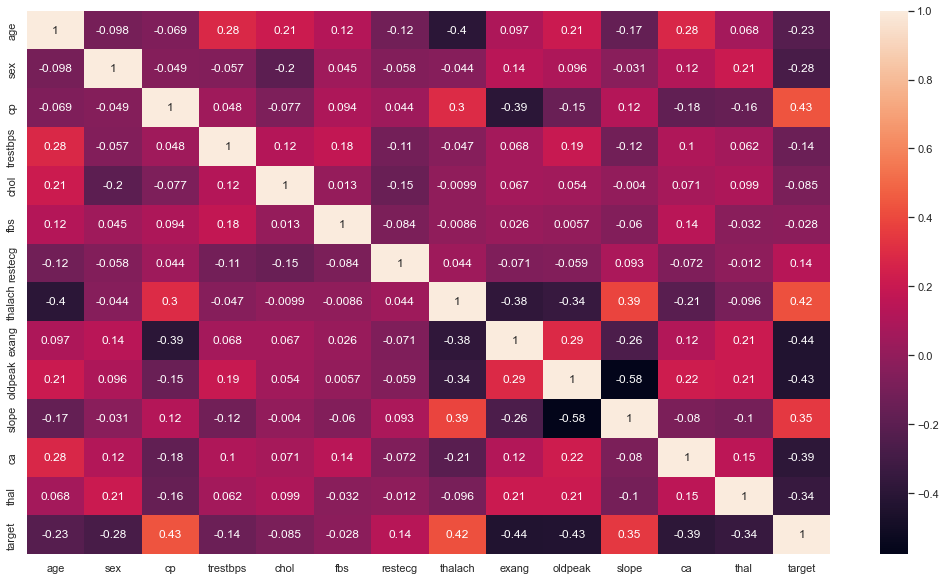

In [452]:
sns.heatmap(correlation,annot=True,)

#### According with the correlation analysis there are no high correlation between variables

### Now, we pick our features and target

In [93]:
cvd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_category,age_bins
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Disease,"(58, 63]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Disease,"(34, 38]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Disease,"(38, 43]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Disease,"(53, 58]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Disease,"(53, 58]"


In [153]:
features = cvd.drop(['fbs','target','target_category','age_bins'], axis=1).values
features

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [154]:
type(features)

numpy.ndarray

In [155]:
target = cvd.iloc[:,-3].values
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [156]:
type(target)

numpy.ndarray

In [157]:
features.shape

(302, 12)

In [158]:
target.shape

(302,)

### Train-Test split 

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=10)

In [161]:
print(X_train.shape)

print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 12)
(61, 12)
(241,)
(61,)


In [162]:
from sklearn.linear_model import LogisticRegression

In [234]:
lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix,classification_report

y_preds = lr_model.predict(X_test)

confusion_matrix(y_test,y_preds)

/Users/leona/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[24,  9],
       [ 1, 27]])

In [235]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        33
           1       0.75      0.96      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.85      0.84        61
weighted avg       0.86      0.84      0.84        61



### The accuracy of the model, which includes all the features variables, is good (84%), but the precision to predict our positive value (1) is not that good. Now, we check ROC and AUROC

In [241]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
auc = roc_auc_score(y_test,y_preds)
auc

0.8457792207792207

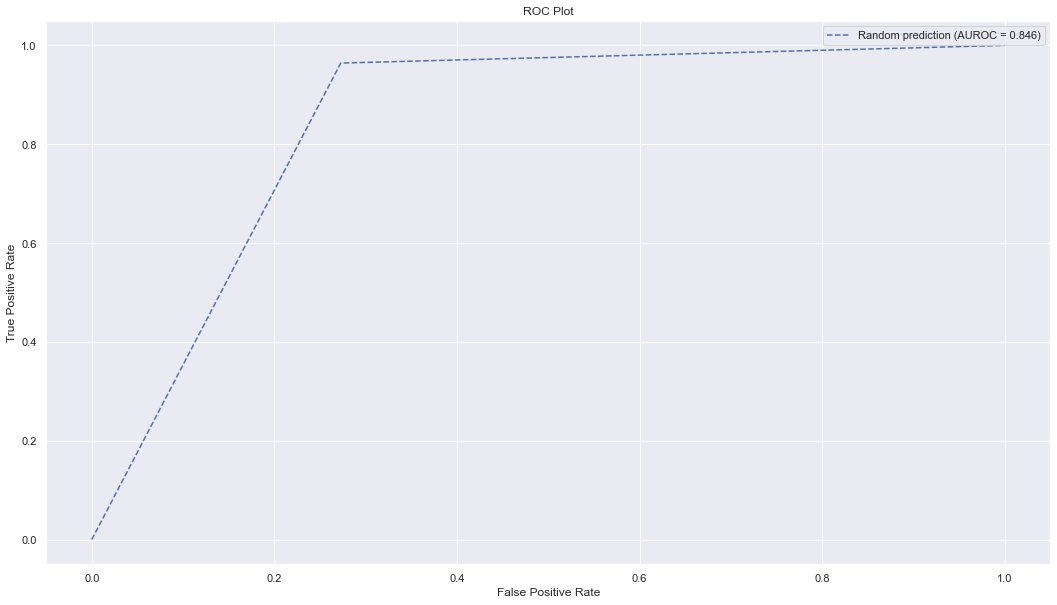

In [242]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

#create ROC curve
plt.plot(fpr,tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## To conclude, we have a model with 84% of accuracy in the predictions and a AUC Score of 0.8457, which indicates a good model to predict cases with CVD or not

In [252]:
cvd.to_csv('/Users/leona/Documents/Personales/Data Analytics-Simpli Learn/5-Data Analyst Capstone/Project 1/cvd_project.csv') 